# Web Scraping 

We have scrap the data from `https://www.bgr.in` using beautifulsoup, selenium and scrapy, we can compare their scripts that which is better in terms of functinality, speed and efficient to write. The scraped data is stored in *data* directory. 

We will clean the data ,visulize insight of it and try feature engineering to get valuable features out of it.

In [129]:
## import libs
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import json
import re
import seaborn as sns

In [130]:
#reading data
df=pd.read_csv('data/scrapy_data.csv')

In [131]:
df.head()

,name,Device Type,Sim Capability,Input Mechanism,Availability,Software,Processor,Internal Memory,Internal Storage,Dedicated Micro SD Card,...,Front Camera Resolution,Battery Capacity,USB Type,Fast Charging,Wireless Charging,Network Type,Network Capability,Fingerprint Sensor,Face Unlock,price
0,Samsung Galaxy F22,Smartphone,Dual-SIM,Touchscreen,Available In India,Android 11,MediaTek Helio G80,4GB,64GB,Yes,...,13MP,6000mAh,USB Type-C,Yes,No,GSM,"2G, 3G, 4G",Side-Mounted,Yes,"12,499"
1,Realme X7 Max 5G,Smartphone,Dual-SIM,Touchscreen,Available In India,Realme UI 2.0 Based on Android 11,MediaTek Dimensity 1200,8GB,128GB,Yes,...,16MP,4500mAh,USB Type-C,Yes,No,GSM,"2G, 3G, 4G, 5G",Under-Display,No,"26,999"
2,Poco M3 Pro 5G,Smartphone,Dual-SIM,Touchscreen,Available In India,MIUI 12 is based on Android 11,MediaTek Dimensity 700,4GB,64GB,Yes,...,8MP,5000mAh,USB Type-C,Yes,No,GSM,"2G, 3G, 4G, 5G",Side-Mounted,Yes,"13,999"
3,Realme C25s,Smartphone,Dual-SIM,Touchscreen,Available In India,Realme UI 2.0 is based on Android 11,MediaTek Helio G85,4GB,64GB,Yes,...,8MP,6000mAh,USB Type-C,Yes,No,GSM,"2G, 3G, 4G",Rear-Mounted,No,"9,999"
4,iQOO Z3,Smartphone,Dual-SIM,Touchscreen,Available In India,OriginOS for iQoo 1.0 is based on Android 11,Qualcomm Snapdragon 768G,6GB,128GB,Yes,...,16MP,4400mAh,USB Type-C,Yes,No,GSM,"2G, 3G, 4G",Under-Display,Yes,"19,990"


### Data cleaning

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   name                     150 non-null    object
 1   Device Type              146 non-null    object
 2   Sim Capability           119 non-null    object
 3   Input Mechanism          150 non-null    object
 4   Availability             140 non-null    object
 5   Software                 146 non-null    object
 6   Processor                146 non-null    object
 7   Internal Memory          147 non-null    object
 8   Internal Storage         122 non-null    object
 9   Dedicated Micro SD Card  119 non-null    object
 10  3.5 mm Jack              114 non-null    object
 11  Display Technology       123 non-null    object
 12  Display Size             150 non-null    object
 13  Display Resolution       148 non-null    object
 14  Main Camera              119 non-null    o

from above we can see that their are some null values available in this data, and we very small data ,so we cannot directly drop those rows. I am replacing those value with **none**.

In [133]:
df.fillna('none',inplace=True)

In [134]:
df.columns

Index(['name', 'Device Type', 'Sim Capability', 'Input Mechanism',
       'Availability', 'Software', 'Processor', 'Internal Memory',
       'Internal Storage', 'Dedicated Micro SD Card', '3.5 mm Jack',
       'Display Technology', 'Display Size', 'Display Resolution',
       'Main Camera', 'Main Camera resolution', 'Front Camera',
       'Front Camera Resolution', 'Battery Capacity', 'USB Type',
       'Fast Charging', 'Wireless Charging', 'Network Type',
       'Network Capability', 'Fingerprint Sensor', 'Face Unlock', 'price'],
      dtype='object')

Their are many columns , and some are not usefull like : `3.5 mm Jack`,`Sim Capability`,`Network Type` etc..
Now we will look over the unique values to get useful values out of it. And to get the useful values we will use the regex.

In [135]:
df['Display Resolution'].unique()

array(['720x1600', '1080x2400', '1080x2408', '2400 x 1080', '1080*2460',
       '2400x1080', '1600x720', '1080x2460', '2404×1080 (FHD+)',
       '1600x720 (HD+)', '2400 x 1080 (FHD+)', '2340x1080 FHD+',
       '2400*1080', '1080×2400', '2400x1080 FHD+', '1080×2400 FHD+',
       '1440x3200', '720 x 1600 (HD+)', '720x1,600 pixels',
       '2448x1080 FHD+', '1,080x,2,400 pixels', '1080x2400 pixels',
       '2400 x 1080 pixels', '3216 X 1440 pixels', '1080x2376',
       '1600 x 720 Pixels', '720*1600', '2400 x 1080FHD+',
       '1080x2340 pixels', '2400 x 1080 FHD+', '2400x1080 ', '1640 x 720',
       'none', '2408 × 1080 (FHD+)', '720 x 1520 pixels',
       '720x1,560 pixels', '1,080x2,400 pixels', '1600*720',
       '720 x 1600 pixels', 'Full HD+', '2400 x 1080 ', '1560×720',
       '2408 × 1080', '1600×720', '2400×1080 (FHD+)', '720*1640',
       '1600x720 HD+', '720x1640', '2340x1080 ', '2400x1080 pixels',
       'Full-HD+', 'HD+', '2,532x1,170 pixels', 'Super Retina XDR',
       'FHD+

The unique value for resolution is of string type and we need pixel dimension only ,we can see that some "x" is represented by "*", and their is also space around  "*".  
Ex: 1600-by-720-pixel, the "x" is represented as "by".

Now let's look at other attributes also.

In [136]:
df['Display Size'].unique()

array(['6.40-inch', '6.43-inch', '6.50-inch', '6.58-inch', '6.43 inch',
       '6.44-inch', '6.95-inch', '6.55 inch', '6.5 inch', '6.78 inch',
       '6.44 inch', '6.52-inch', '6.53 inch', '6.80 inch', '6.62 inch',
       '6.4 inch', '6.67 inch', '6.81-inch', '6.60-inch', '6.5-inch',
       '6.67-inch', '6.5-inch ', '6.70-inch', '6.7 inch', '6.56-inch',
       '6.51 inch', '6.43" Inch', '6.82-inch',
       '6.2-inch WQHD+ Infinity-O Dynamic AMOLED', '6.20 inch',
       '6.58 inch', '6.55 inch ', '6.4', '6.39-inch', '6.7-inch',
       '6.51-inch', '6.56 inch', '6.52 inch', '6.78 INCH', '6.8 inch',
       '6.53-inch', '6.1‑inch', '5.4‑inch', '6.4 - inch', '6.4 inch ',
       '16.34cm / 6.43"', '6.67 Full HD+', '5.3 inch', '6.53-inch ',
       '5.81 inch', '6.7 inch ', '5.99-inch', '6.5 ',
       '6.6 inches (16.76 cm)', '6.35 inch', '16.58cm(6.53) HD+ Display',
       '6.2 inch', '6.82 inch', '6.59 inch', '16.50cm (6.5")',
       '16.21cm (6.4") ', '16.6cm/6.5”', '6.5” Total Vision',
   

we need to get the screen size in inch and their are values in cm also.
Ex:6.4 inches (16.26 cm), we need to get 6.4 , but if value in cm would be extracted then values like 16.34cm would be extract ,so we need to use regex to not extract values which have more the 2 digits on the left side of decimal point ,because the screen size of mobile phones are inch and they are not made too huge so we would have only 1 digit on left side of decimal point.

In [137]:
df['Main Camera resolution'].unique()

array(['48MP + 8MP + 2MP + 2MP', '64MP + 8MP + 2MP', '48MP + 2MP + 2MP',
       '13MP + 2MP + 2MP', '64MP + 2MP + 2MP', '64MP + 8MP + 2MP + 2MP',
       '64MP+8MP+5MP', '108MP + 8MP + 2MP', '64MP+8MP+2MP',
       '13MP + 8MP + 5MP + 2MP', '8MP', '48MP+13MP+ 2MP',
       '108MP+8MP+2MP+2MP', '48 MP + 8 MP + 2 MP + 2 MP',
       '48MP + 5MP + 2MP + 2MP', '48MP + 8MP + 5MP', '108MP + 8MP + 5MP',
       '50MP + 48MP + 48MP', '48MP + 8MP + 5MP + 5MP', '64MP+8MP+2MP+2MP',
       '48MP+5MP+2MP+2MP', '64MP + 13MP + 5MP',
       '48MP + 2MP Depth + 2MP Macro', '64MP+12MP+5MP+5MP',
       '64MP+12MP+8MP+5MP', '48MP+16MP+5MP+2MP', '48MP+50MP+2MP',
       '48MP+50MP+8MP+2MP', '50MP + 48MP + 32MP + 8MP', '48MP+8MP+2MP',
       '13MP+monochrome portrait sensor', '48MP+2MP+8MP+2MP',
       '64MP+5MP+8MP+2MP', '108MP+5MP+8MP+2MP',
       '48.0 MP + 5.0 MP + 2.0 MP + 2.0 MP', '48MP+ 8MP+ 2MP+ 2MP',
       '13MP+quad LED', 'Triple - 12MP+12MP+64MP', '12MP+12MP+64MP',
       '48MP+2MP+2MP', '64MP+8MP+2M+

As many phones have multiple cameras ,so we need to extract only the pixel values and remove the other char or symbol.
Ex: 12MP Wide camera ƒ/1.8 aperture' , if we extract numerical value using regex the f/1.8 would also be extract ,so we need not to include these values.

In [138]:
df['price'].unique()

array([' 12,499', ' 26,999', ' 13,999', ' 9,999', ' 19,990', ' 22,999',
       ' 20,990', ' 10,999', ' 16,999', ' 21,999', ' 9,499', ' 17,999',
       ' 29,990', ' 14,990', ' 17,990', ' 18,990', ' 6,799', ' 7,999',
       ' 31,990', ' 18,999', ' 8,999', ' 29,999', ' 39,999', ' 69,999',
       ' 14,999', ' 49,999', ' 10,499', ' 26,499', ' 34,999', ' 64,999',
       ' 69,990', ' 11,999', ' 15,999', ' 12,999', ' 21,490', ' 25,990',
       ' 7,199', ' 70,500', ' 81,999', ' 16,490', ' 19,999', ' 23,999',
       ' 9,990', ' 8,499', ' 24,990', ' 35,990', ' 11,490', ' 37,990',
       ' 49,990', ' 8,299', ' 35,999', ' 20,999', ' 79,900', ' 69,900',
       ' 15,499', ' 42,999', ' 6,999', ' 22,990', ' 16,990', ' 12,990',
       ' 5,499', ' 77,999', ' 20,499', ' 11,499', ' 24,999', ' 7,499',
       ' 46,999', ' 34,990', ' 17,499', ' 3,399', ' 74,999', ' 16,499',
       ' 11,990', ' 27,999', ' 44,999', ' 42,500', ' 47,999', ' 27,990'],
      dtype=object)

All atributes are in object type & we need to convert them into `int` as we extract the values from it.
To convert the price value into integer type we need to remove "," and strip the value to remove the extra spaces.

In [139]:
df.iloc[0]

name                           Samsung Galaxy F22
Device Type                            Smartphone
Sim Capability                           Dual-SIM
Input Mechanism                       Touchscreen
Availability                   Available In India
Software                               Android 11
Processor                      MediaTek Helio G80
Internal Memory                               4GB
Internal Storage                             64GB
Dedicated Micro SD Card                       Yes
3.5 mm Jack                                   Yes
Display Technology                         AMOLED
Display Size                            6.40-inch
Display Resolution                       720x1600
Main Camera                           Quad Camera
Main Camera resolution     48MP + 8MP + 2MP + 2MP
Front Camera                        Single Camera
Front Camera Resolution                      13MP
Battery Capacity                          6000mAh
USB Type                               USB Type-C


### Feature Engineering

All the names of the phones are unique and we need to have their brand names in order to perform the further analysis.

Ex:Samsung Galaxy F22, the name is present as first word.

In [140]:
#split the phone name and get the starting index for the brand name
df['brand']=df['name'].apply(lambda x: x.split()[0].lower())

In [141]:
## function to get the OS from their software description
def find_os(x):
    ##use regex to check its android
    if re.findall(r'android',x.lower()):           
        return 'android'
    elif re.findall(r'ios',x.lower()):
        return 'ios'
    ## other OS ,which are not android and OS 
    else:
        return 'other'                 

## function to get the ram 
def ram(x):
    ## regex to get the numberical value
    s= re.findall(r'\d+',x.lower())
    if s:
        if int(s[0])>12:         ## memory decribed as greater than 12 is miss info with storage ,making them 0
            return 0
        else:
            return int(s[0])
    else:
        return 0
    
## function to remove the "," and then get the numerical value     
def get_num(x):
    x=x.replace(",","")
    s= re.findall(r'\d+',x.lower())
    if s:
        return int(s[0])
    else:
        return 0

##function to get the screen size
def screen(x):
    x=" "+x
    #regex to get numeric value with only 1 digit on left side of decimal point
    x= re.findall(r'[^1-9](\d.\d+)',x.lower())
    if x :
        return x[0]
    else:
        return 0

#function to get the screen resolution
def resolution(x):
    #replace ("-" with "" ) and ("by" with "x"), ex: 1600-by-720-pixel resolution
    #replace ("*" with "x") and remove the space before and after "*" or "x", ex:2400 * 1080 (FHD+)
    x=x.replace("-","").replace("by",'x').replace("*",'x').replace(" ","").replace(",","")
    x=re.findall(r'\d+',x.lower())
    if x:
        return x
    else:
        return 0,0

##function to get the camera pixels and removing the aperture value(f/1.8)
def camera(t):
    t=re.sub(r'/\d.\d',"",t)
    return re.findall(r'\d+',t.lower())


##function to get binary labels for attributes like finger sensor, face unlock 
def binary(x):
    #matching if no value is available or not
    x=re.findall(r'no',x.lower())
    if x:
        return 0
    else:
        return 1   

In [142]:
## apply the above functions according to their attibutes 
df['os']=df['Software'].apply(find_os)
df['ram']=df['Internal Memory'].apply(ram)
df['memory']=df['Internal Storage'].apply(get_num) 
df['Display Size']=df['Display Size'].apply(screen).astype(float)  ##converting dtype to float 
##getting the width and height from resolution
df['width'],df['height']=df['Display Resolution'].apply(resolution).str[0].astype(int),df['Display Resolution'].apply(resolution).str[1].astype(int)
df['rear_camera']=df['Main Camera resolution'].apply(camera)
df['front_camera']=df['Front Camera Resolution'].apply(camera)
df['Fast Charging']=df['Fast Charging'].apply(binary)
df['Battery Capacity']=df['Battery Capacity'].apply(get_num)
## map with binary value : wheather that feature is available or not
df['Wireless Charging']=df['Wireless Charging'].apply(binary)
df['Fingerprint Sensor']=df['Fingerprint Sensor'].apply(binary)
df['Face Unlock']=df['Face Unlock'].apply(binary)
##making price value to int by removing the ","
df['price']=df['price'].apply(lambda x: x.replace(",","").strip()).astype(int)

I was checking the dataframe after cleaning attributes , the camera values for `Oneplus 8` at index `143` is not correct , so we need to  correct them. 

In [143]:
df.iloc[143]

name                                                               OnePlus 8
Device Type                                                       Smartphone
Sim Capability                                                          none
Input Mechanism                                                       QWERTY
Availability                                              Available in India
Software                                       OxygenOS based on Android 10 
Processor                                            Qualcomm Snapdragon 865
Internal Memory                           8GB RAM and 128GB internal storage
Internal Storage                                                        none
Dedicated Micro SD Card                                                 none
3.5 mm Jack                                                             none
Display Technology                                                      none
Display Size                                                            6.55

In [144]:
df['rear_camera'][143]=['48', '5', '2', '16']

<ipython-input-144-c15541985f4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rear_camera'][143]=['48', '5', '2', '16']


We have extract the camera values in list so we take the sum of them .

In [145]:
##function to get the total camera pixel in a phone
def total_camera(x):
    sum=0
    x = list(map(int, x))
    for i in x:
    
        sum+=i
    return sum

In [91]:
##get the total pixel in a phone
df['rear_camera_total']=df['rear_camera'].apply(total_camera).astype(int)
df.columns

Index(['name', 'Device Type', 'Sim Capability', 'Input Mechanism',
       'Availability', 'Software', 'Processor', 'Internal Memory',
       'Internal Storage', 'Dedicated Micro SD Card', '3.5 mm Jack',
       'Display Technology', 'Display Size', 'Display Resolution',
       'Main Camera', 'Main Camera resolution', 'Front Camera',
       'Front Camera Resolution', 'Battery Capacity', 'USB Type',
       'Fast Charging', 'Wireless Charging', 'Network Type',
       'Network Capability', 'Fingerprint Sensor', 'Face Unlock', 'price',
       'brand', 'os', 'ram', 'memory', 'width', 'height', 'rear_camera',
       'front_camera', 'rear_camera_total'],
      dtype='object')

Now we need to delete the attributes from which we have extract the numerical values like:
`Device Type`,`Sim Capability`,`Input Mechanism`,`Display Resolution`,`Availability`,`Dedicated Micro SD Card`,`3.5 mm Jack`,`Display Technology`,`Internal Memory`,`Internal Storage`,`Network Type`,`Main Camera`, `Main Camera resolution`, `Front Camera`,
       `Front Camera Resolution`,`Network Capability`,`Display Resolution`.

In [92]:
df.drop(['Device Type','Sim Capability','Input Mechanism','Display Resolution','Availability','Dedicated Micro SD Card','3.5 mm Jack','Display Technology','Internal Memory','Internal Storage','Network Type','Main Camera', 'Main Camera resolution', 'Front Camera',
       'Front Camera Resolution','Network Capability','Display Resolution'],axis=1,inplace=True)

In [93]:
df

,name,Software,Processor,Display Size,Battery Capacity,USB Type,Fast Charging,Wireless Charging,Fingerprint Sensor,Face Unlock,price,brand,os,ram,memory,width,height,rear_camera,front_camera,rear_camera_total
0,Samsung Galaxy F22,Android 11,MediaTek Helio G80,6.40,6000,USB Type-C,1,0,1,1,12499,samsung,android,4,64,720,1600,"[48, 8, 2, 2]",[13],60
1,Realme X7 Max 5G,Realme UI 2.0 Based on Android 11,MediaTek Dimensity 1200,6.43,4500,USB Type-C,1,0,1,0,26999,realme,android,8,128,1080,2400,"[64, 8, 2]",[16],74
2,Poco M3 Pro 5G,MIUI 12 is based on Android 11,MediaTek Dimensity 700,6.50,5000,USB Type-C,1,0,1,1,13999,poco,android,4,64,1080,2400,"[48, 2, 2]",[8],52
3,Realme C25s,Realme UI 2.0 is based on Android 11,MediaTek Helio G85,6.50,6000,USB Type-C,1,0,1,0,9999,realme,android,4,64,720,1600,"[13, 2, 2]",[8],17
4,iQOO Z3,OriginOS for iQoo 1.0 is based on Android 11,Qualcomm Snapdragon 768G,6.58,4400,USB Type-C,1,0,1,1,19990,iqoo,android,6,128,1080,2408,"[64, 8, 2]",[16],74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Xiaomi Redmi Note 9,MIUI 11 + Android 10,MTK Helio G85,6.53,5020,USB Type-C,1,0,1,1,10999,xiaomi,android,4,64,2340,1080,"[48, 8, 2, 2]",[13],60
146,Realme X50 Pro 5G,realme UI Based on Android 10,Qualcomm Snapdragon 865 5G Processor,6.44,4200,none,0,0,0,0,47999,realme,android,0,0,2400,1080,"[64, 8, 12, 2]",[],86
147,Realme Narzo 10A,realme UI based on Android 10,Helio G70 AI Processor,6.50,5000,none,0,0,0,0,8499,realme,android,3,0,1600,720,"[12, 2, 2]",[],16
148,Realme Narzo 10,realme UI Based on Android 10,MediaTek Helio G80,6.50,5000,none,0,0,0,0,11999,realme,android,4,0,1600,720,"[48, 2, 8]",[],58


### Data Visualization

We look at the phones which have the 'Fast Charging',	'Wireless Charging','Fingerprint Sensor','Face Unlock' 

In [94]:

bt=df.groupby('brand')['Fast Charging',	'Wireless Charging','Fingerprint Sensor','Face Unlock'].sum()

<ipython-input-94-cd6e07bef893>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bt=df.groupby('brand')['Fast Charging',	'Wireless Charging','Fingerprint Sensor','Face Unlock'].sum()


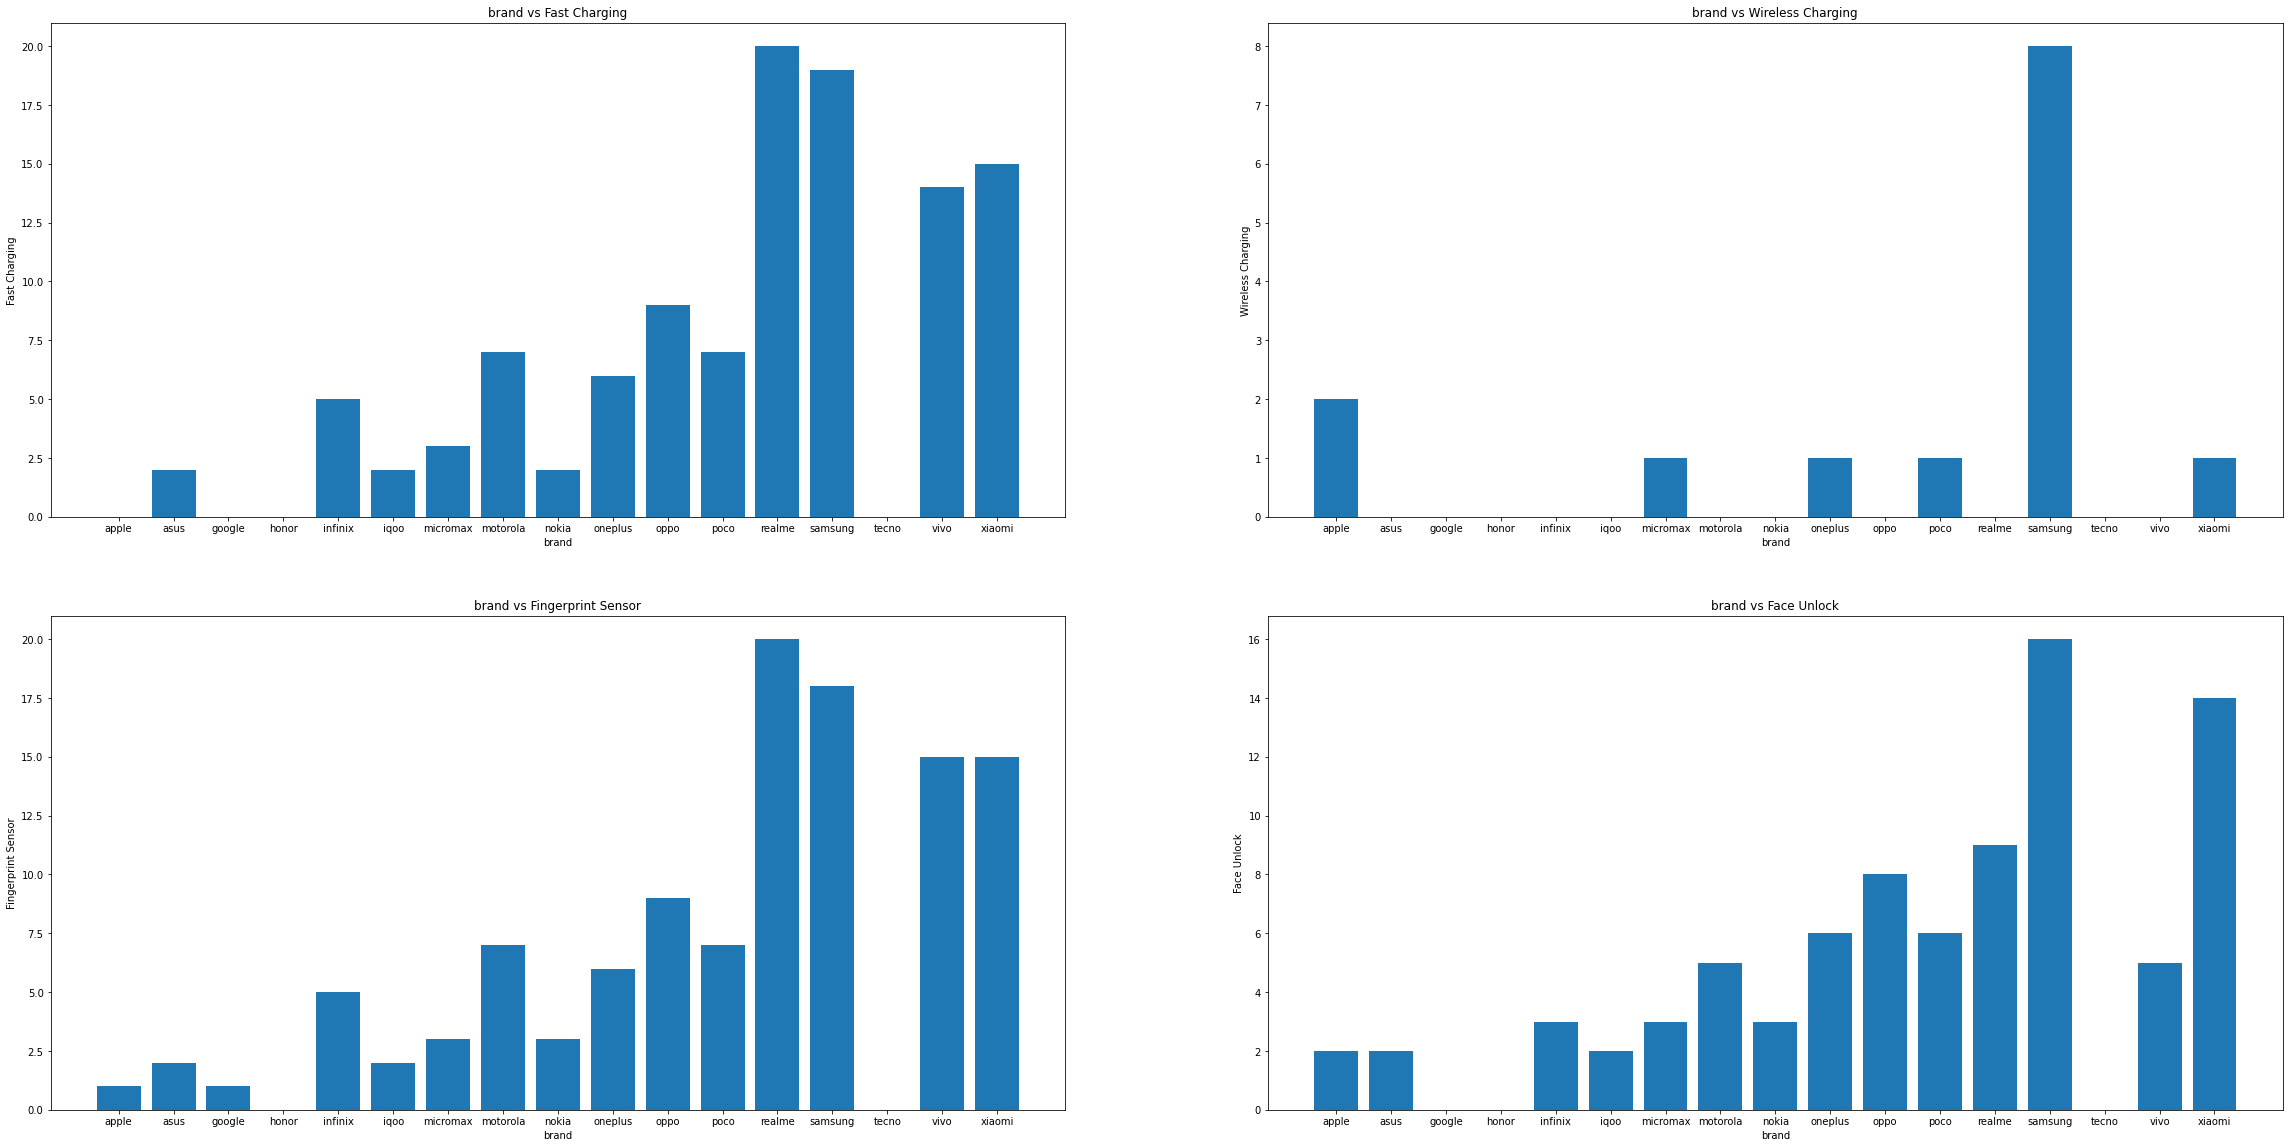

In [96]:
figure, axis = plt.subplots(2, 2,figsize=(40, 20))
i=0
j=0
f=0
## creating bar plot for each col 
for col in bt.columns:
    if j==0 and f: 
        i+=1
  
    axis[i,j].bar(bt.index, bt[col])
    axis[i,j].set_xlabel('brand')
    axis[i,j].set_ylabel(col)
    axis[i,j].title.set_text('brand vs '+col)
    j=(j+1)%2
    f=1


plt.show()

1. Fast Charging :
Realme ,Samsung ,Xiaomi have most of their phones with fast charging

2. Wireless Charging :
Samsung,apple, & some phones by xiaomi have  their phones with fast charging

3. Fingerprint sensor :
Realme ,Samsung,Vivo,Xiaomi have most of their phones with fast charging
4. Face Unlock :
Samsung and Xiaomi has most phones with face unlock

The samsung and xiaomi are the phones with most of the techs in it ,so lets look at their feature too.

In [98]:
## group by 'brand' and taking the mode of the values 
brand_mode=df.groupby('brand').agg(lambda x: pd.Series.mode(x)[0])

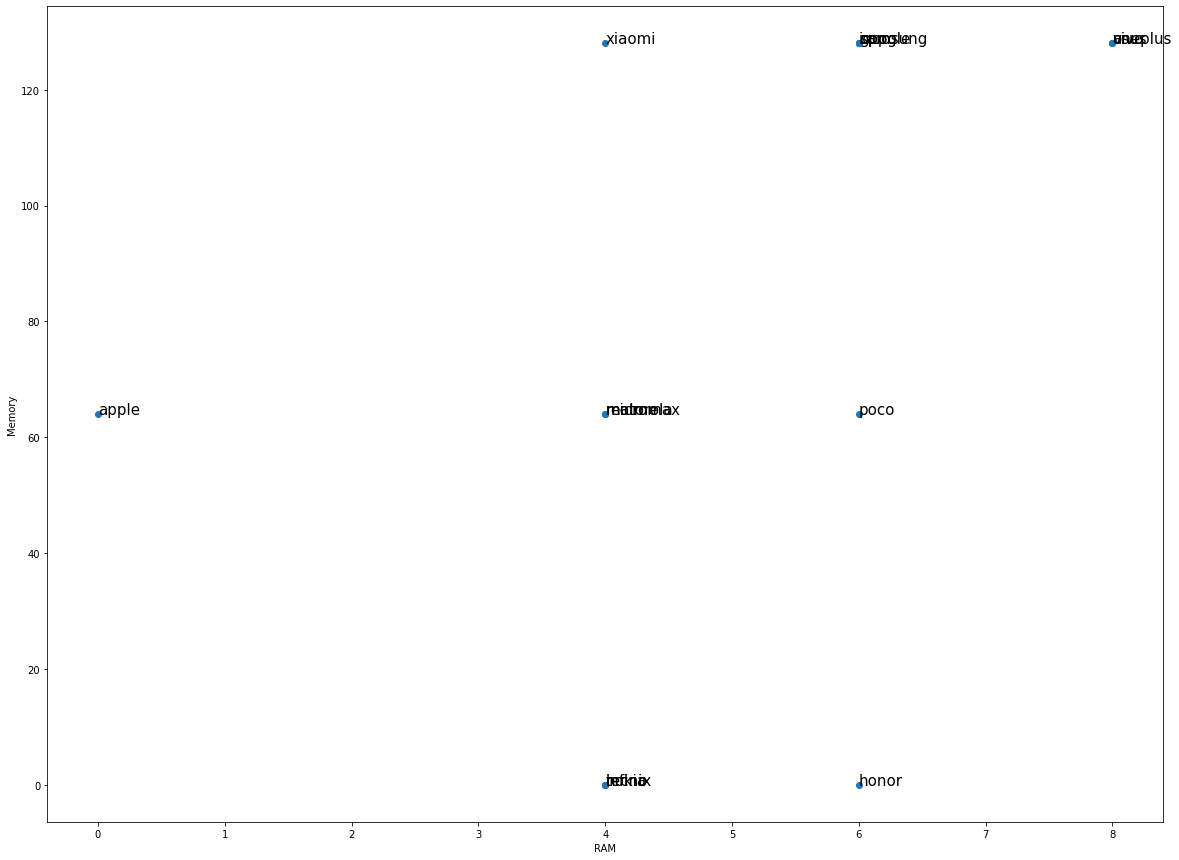

In [99]:
#plot the ram vs storage trend by each brand for most of their phones
plt.figure(figsize=(20,15))
plt.scatter(brand_mode['ram'],brand_mode['memory'])
for index, row in brand_mode.iterrows():
    plt.annotate(index,(row['ram'],row['memory']),fontsize=15)

plt.xlabel('RAM') 
plt.ylabel("Memory")   
plt.show()


Companies like :`xiaomi`,`oneplus`,`oppo`,`samsung` provide most phones with internal storage as 128 Gb and RAM >=4GB.

<AxesSubplot:ylabel='os'>

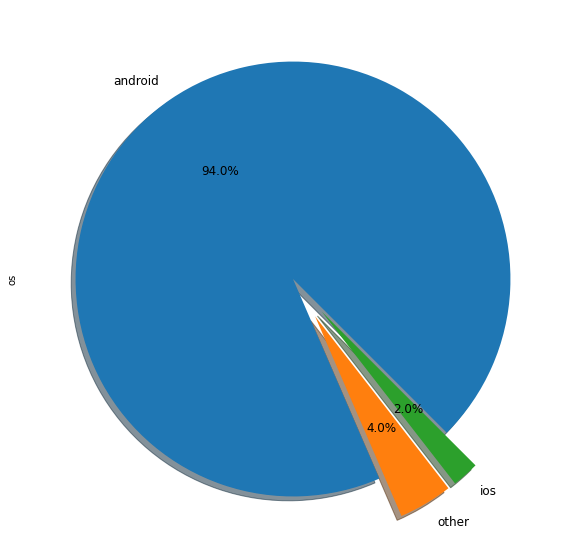

In [100]:
##plot a pie chart for OS types 
df['os'].value_counts().plot.pie(figsize=(15,10),autopct='%1.1f%%', shadow=True,explode=(0, 0.2, 0.2),startangle=-45,fontsize=12)

the market is occupied by android phones ,only 2% phones are IOS and 4% are other OS. 

Let's look at the popular mobile brands.

C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


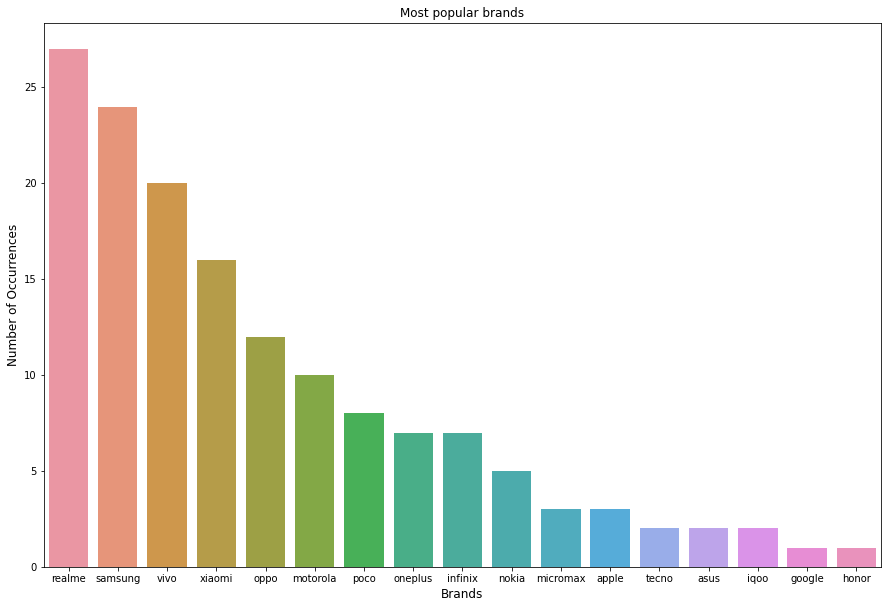

In [101]:
#barplot for freq of phones as per the brands
plt.figure(figsize=(15,10))
brands=df['brand'].value_counts()
sns.barplot(brands.index, brands.values)
plt.title('Most popular brands')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Brands', fontsize=12)
plt.show()

Most of the phones in the market are by `realme`,`samsung`,`vivo` and `xiaomi`.

As the samsung and xiaomi are the phones most of the features in it and also the most of the market are occupied by them ,so lets check at their prices.

C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


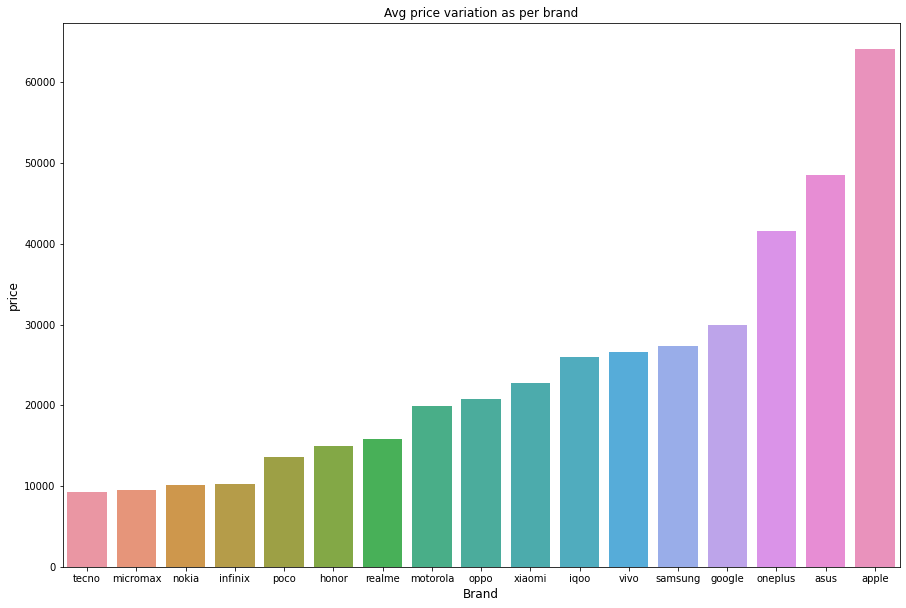

In [102]:
##take the avg of prices according to their brands
price_df=df.groupby('brand').mean().sort_values('price')
plt.figure(figsize=(15,10))
##barplot for the prices of phones
sns.barplot(price_df.index, price_df['price'])
plt.title('Avg price variation as per brand')
plt.ylabel('price', fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.show()

The avg price of:
* Samsung:28k
* Xiaomi:22k
* Vivo:25k
* Realme:15k

Realme is the brand with less price but the charging and memory is not good as comapare to samsung and xiaomi. But their are also phones by sumsung with less prices and less memory also.

Now lets look at the camera ,for which is one of the priority by the user while buying phones.

C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


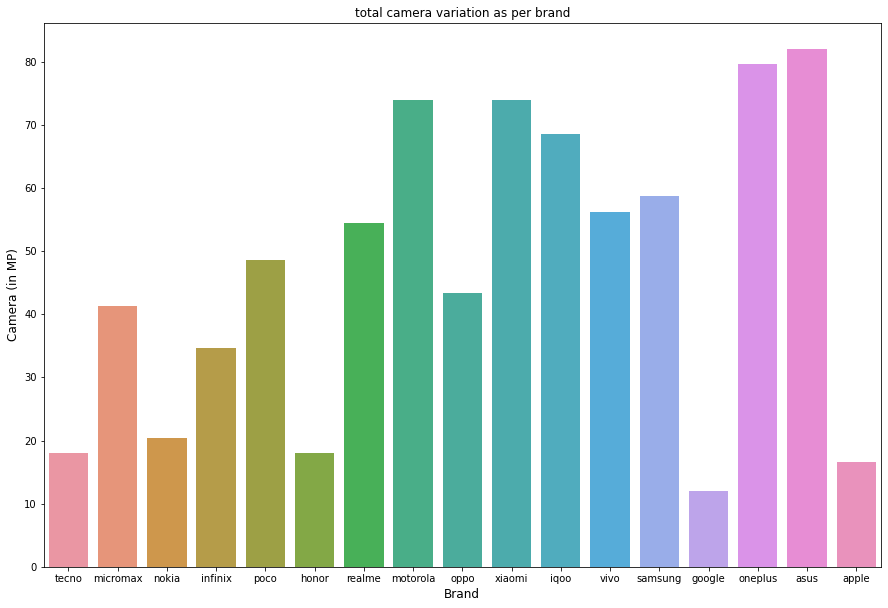

In [103]:
plt.figure(figsize=(15,10))
##barplot for the total rear camera pixel in a phone
sns.barplot(price_df.index, price_df['rear_camera_total'])
plt.title('total camera variation as per brand')
plt.ylabel('Camera (in MP)', fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.show()

Camera with highes pixel is mage by :
* Oneplus
* Asus
* Xiaomi
* Motorola
* Samsung

If we look at the prices of oneplus and Asus ,then they are quit expensive. And we know that camera quality of iphones better than any of the phone but the MP by them are very less , which shows it the build quality of camera is more important. So we need to look at the build quality of camera before buying the phones .

Now let's check the affect of battery usage due the screen size.

In [104]:
#group by 'Battery capacity' and taking mode of it
bat=df.groupby('Battery Capacity').agg(lambda x: pd.Series.mode(x)[0])
#selecting the non zero values
bat=bat[bat['height']!=0]
#ploting the bar for screen size and battery capacity
bat['Display Size'].plot.bar(figsize=(15,10),ylabel='Screen size(inch)')

<AxesSubplot:xlabel='Battery Capacity', ylabel='pixel'>

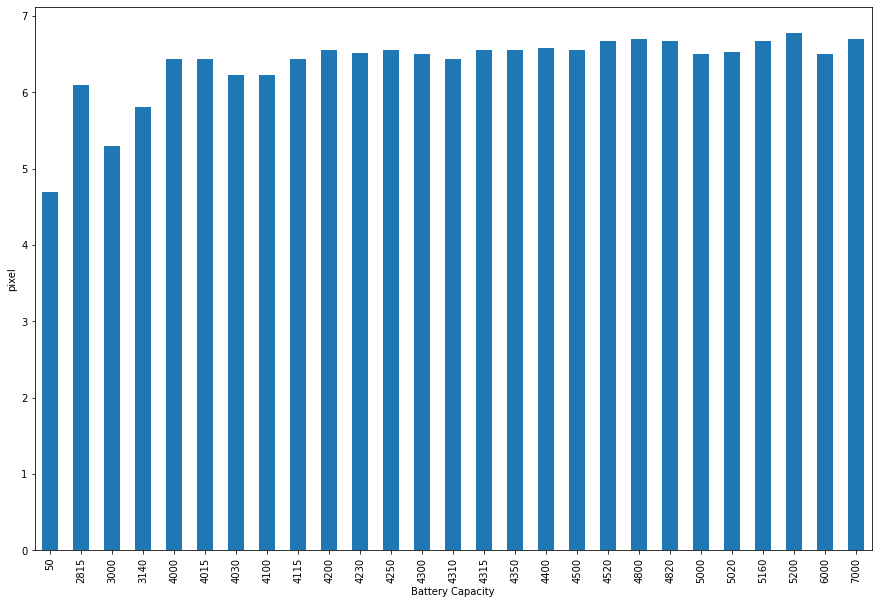

From above we cannot see any variation among the battery capacity and screen size. Lets check affect due to screen resolution.

<AxesSubplot:xlabel='Battery Capacity', ylabel='pixel'>

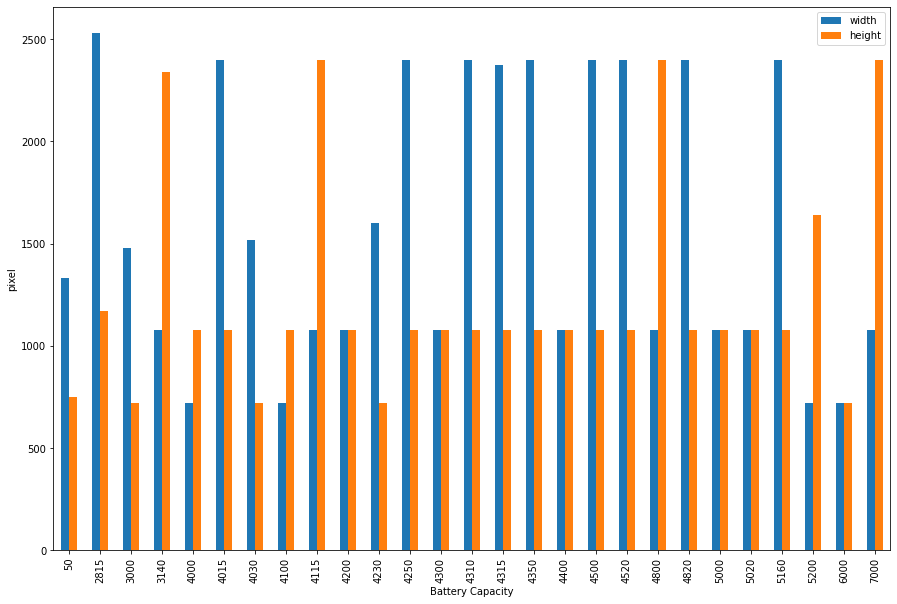

In [107]:
#plot the width and heigth vs battery capacity
bat[['width','height']].plot.bar(figsize=(15,10),ylabel='pixel')

The screen resolution is slight less with highest battery capacity phones, and before that the resolution of phones are almost same.

C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Battery Capacity', ylabel='brand'>

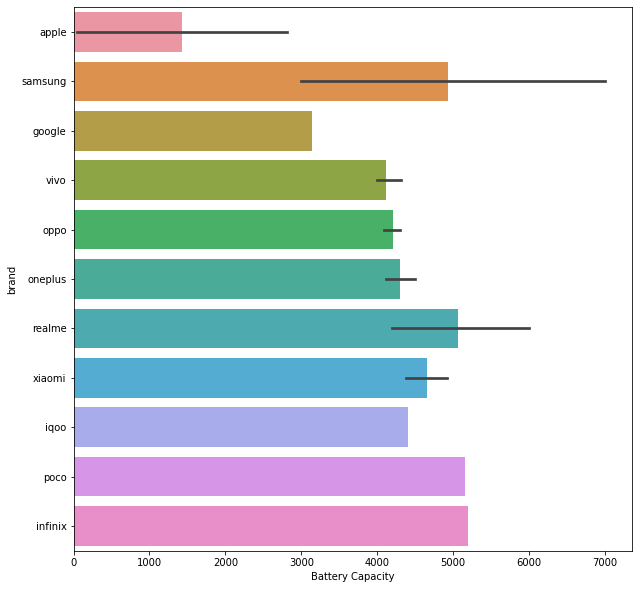

In [108]:
#plot the phones with highest battery capacity and their brands
plt.figure(figsize=(10,10))
sns.barplot(bat.index,bat['brand'])

The best battery capacity phones are:
* samsung
* realme
* poco
* xiaomi
* infinix

From here we can say that samsung is middle range phones with most the features in it, others best phones under the budget are realme,xiaomi,poco. But these are chineese phone so one need to think

In [109]:
df['USB Type'].value_counts()

USB Type-C    112
none           31
Micro-USB       7
Name: USB Type, dtype: int64

Most of the USB type in popular phones are USB-C type.

<AxesSubplot:>

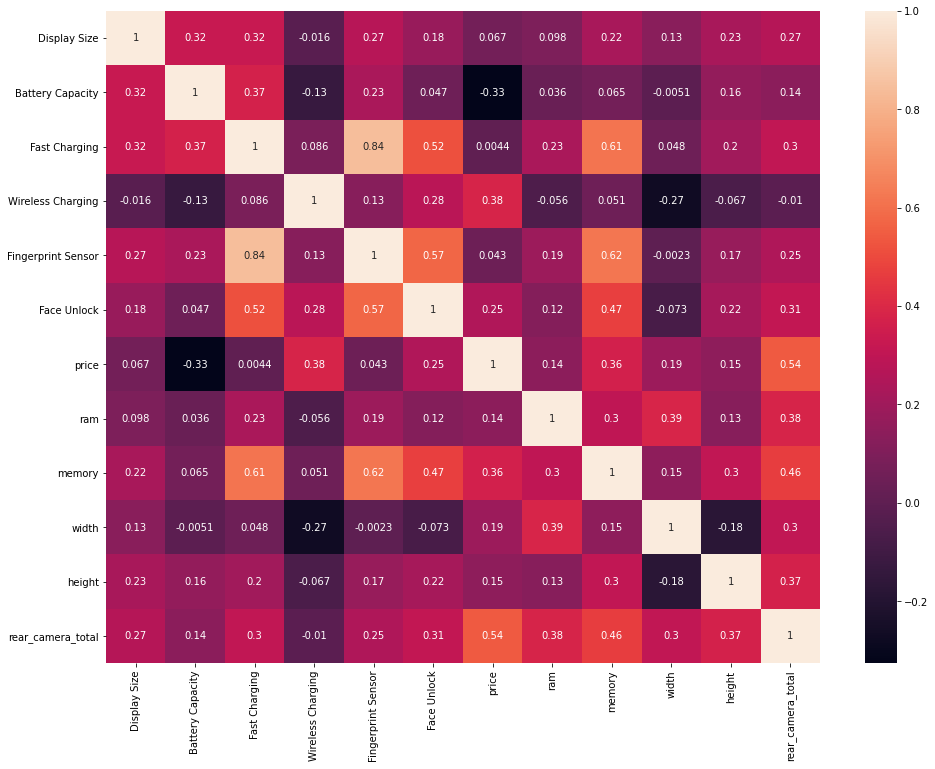

In [116]:
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), annot=True)

The price is correlated with : `Battery Capacity` , `Charging type`, `Face Unlock`, `memory` ,`camera`. 

We have the camera values in a list as their can be mutiple cameras , so we can convert them to one-hot encoding for ML.